# INTEGRATED JOB POST VERIFICATION ND PERSONALIZED JOB RECOMMENDATION SYSTEM

## STEP-1 Data Collection

In [182]:
#importing the modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
#collected the data from kaggle and converting the csv file to dataframe
job_data = pd.read_csv("fake_job_postings.csv")

In [184]:
#extracting information about the data
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [185]:
# Display summary statistics for numerical columns
print(job_data.describe())

             job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [186]:
#dimensions of the data
job_data.shape

(17880, 18)

~ We can see that there are
* Total 17880 rows
* And 18 columns

In [187]:
job_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [188]:
# counting the number of nan values in each columns
nan_count_per_column = job_data.isna().sum()

#and printing the result
print(nan_count_per_column)

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


~ From the above information we can see that there are number of columns which have nan value except few.

## Step -2 Starting with data preprocessing and EDA

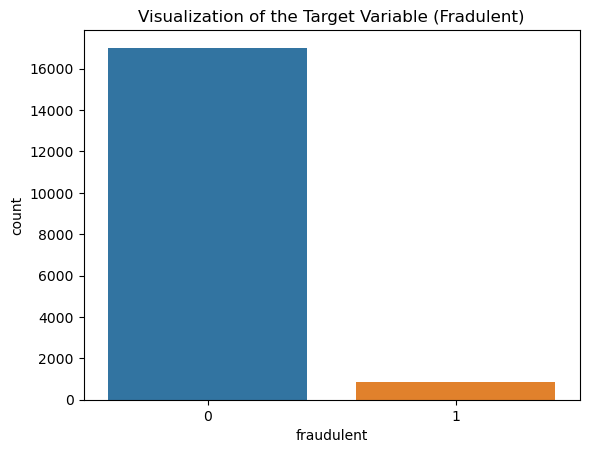

In [189]:
# Visualization of the distribution for the target variable which fradulent
sns.countplot(x='fraudulent', data=job_data)
plt.title('Visualization of the Target Variable (Fradulent)')
plt.show()

This code employs the seaborn library to generate a count plot illustrating the distribution of the target variable, "fraudulent." This visualization aids in assessing the balance or imbalance between job descriptions classified as fraudulent and those categorized as non-fraudulent.

### **Exploring Some Categorical Variables**

This code offers an understanding of the distinct values present in each categorical column along with their respective frequencies.

In [190]:
#finding the unique value in each categorical columns
job_data_categorical = ['title', 'location','department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

for job_c in job_data_categorical:
    print("The number of unique value counts in {}:\n{}\n".format(job_c, job_data[job_c].value_counts()))
    print("\n")



The number of unique value counts in title:
English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64



The number of unique value counts in location:
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,       

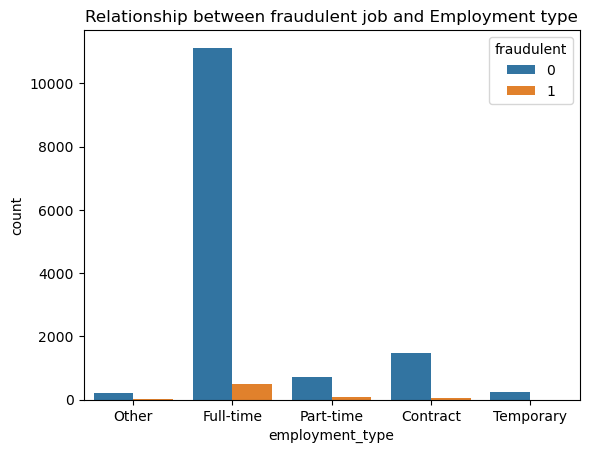

In [191]:
# visualization between the fraudulent job and employment_type
sns.countplot(x='employment_type', hue='fraudulent', data=job_data)
plt.title('Relationship between fraudulent job and Employment type')
#showing the plot
plt.show()


~From the above visualization we can see that the fulltime have maxiumum number of jobs both fradulent and non-fradulent

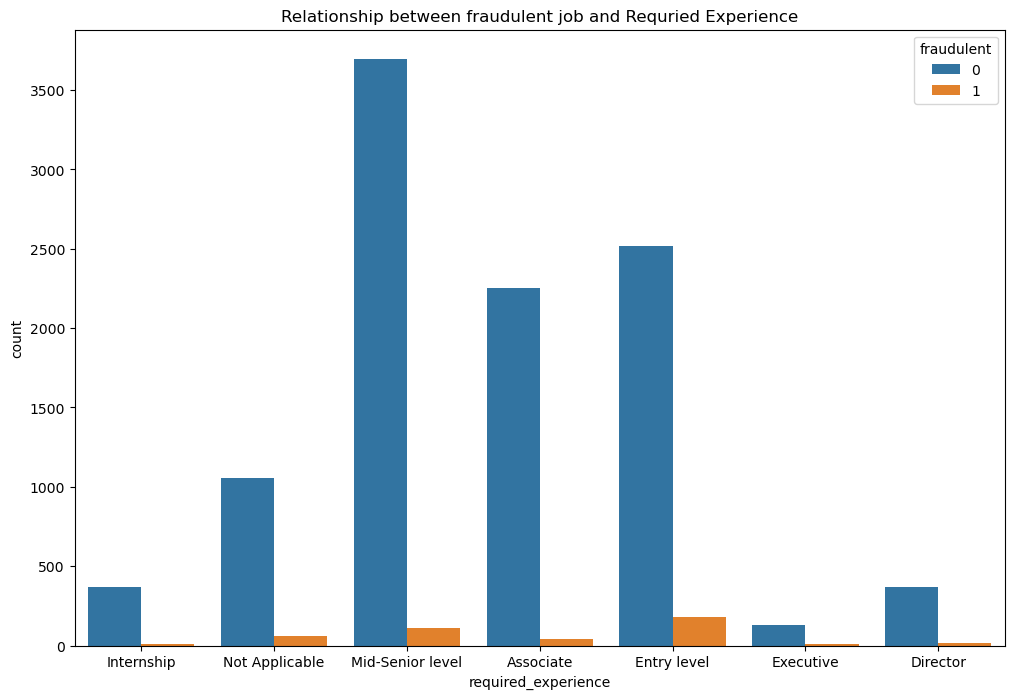

In [192]:
# visualization between the fraudulent job and Required Experience
plt.figure(figsize=(12, 8))
sns.countplot(x='required_experience', hue='fraudulent', data=job_data)
plt.title('Relationship between fraudulent job and Requried Experience')
#showing the plot
plt.show()

~ From the above graph we can see
* that maximum number of jobs required mid-senior experience in non-fradulent job posting
* Also the maximum number of jobs required entry level in fradulent job posting

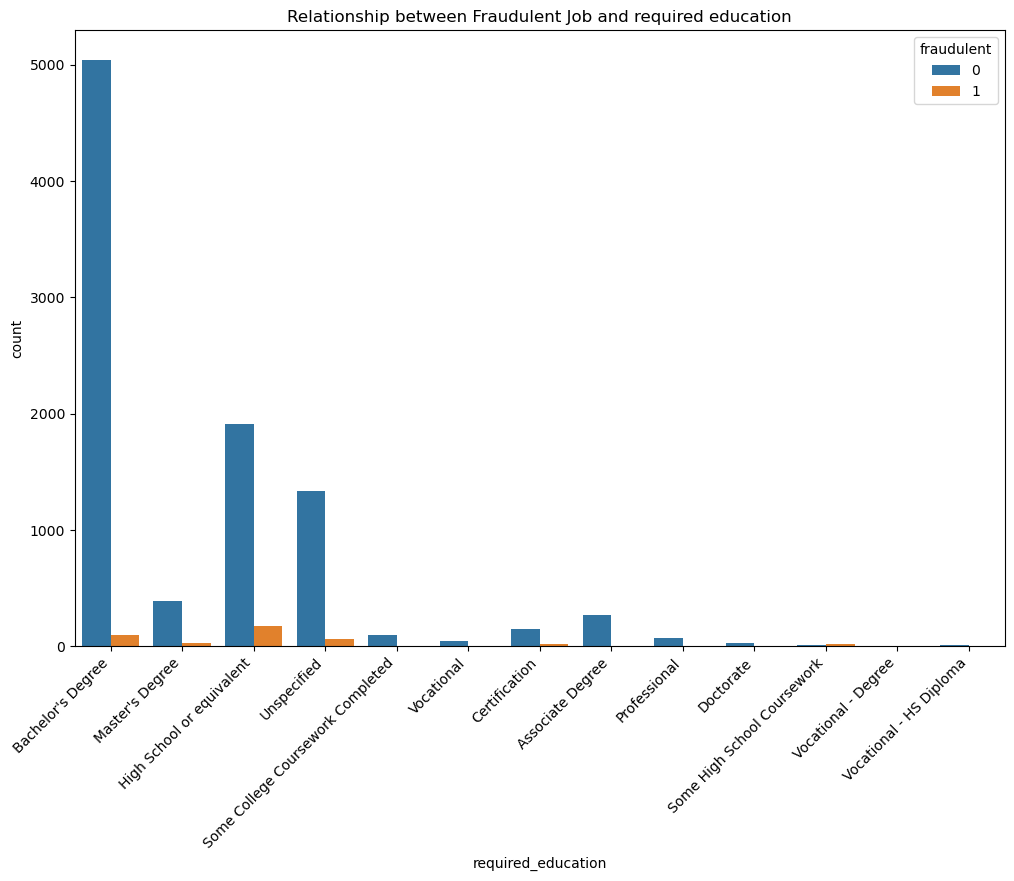

In [193]:
# Here we are seting the dimensions of our ploy
plt.figure(figsize=(12, 8))
#visualization between the fraudulent job and requried_education
ax = sns.countplot(x='required_education', hue='fraudulent', data=job_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Relationship between Fraudulent Job and required education')
#displaying the plot
plt.show()


~From the above graph we can see
* that the maximum job which is not fradulent posting require Bachelor' Degree
* The maximum job which is fradulent posting require High School or equilavent Degree

In [194]:
# Filling the missing value in location, company_profile, and requirements with ''.

# job_data['location'].fillna('', inplace=True)

# job_data['company_profile'].fillna('', inplace=True)

# job_data['requirements'].fillna('', inplace=True)

In [195]:
#Extracting only those columns which have the datatype as object
# and getting there names
columns_jobtext_data = job_data.select_dtypes(include='object').columns.tolist()

# printing them
print(columns_jobtext_data)

['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [196]:
#filling nan value with ''
job_data[columns_jobtext_data] = job_data[columns_jobtext_data].fillna(' ')


In [197]:
job_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [198]:
job_data['location']

0            US, NY, New York
1              NZ, , Auckland
2               US, IA, Wever
3          US, DC, Washington
4          US, FL, Fort Worth
                 ...         
17875         CA, ON, Toronto
17876    US, PA, Philadelphia
17877         US, TX, Houston
17878           NG, LA, Lagos
17879       NZ, N, Wellington
Name: location, Length: 17880, dtype: object


* In the location column we see that it consist of country followed by state and then specific location in that state.
* We will just extract the country

In [199]:
# Spliting the location column to extract only the country
job_data['country'] = job_data['location'].str.split(',').str[0]

#printing the result
job_data['country']

0        US
1        NZ
2        US
3        US
4        US
         ..
17875    CA
17876    US
17877    US
17878    NG
17879    NZ
Name: country, Length: 17880, dtype: object

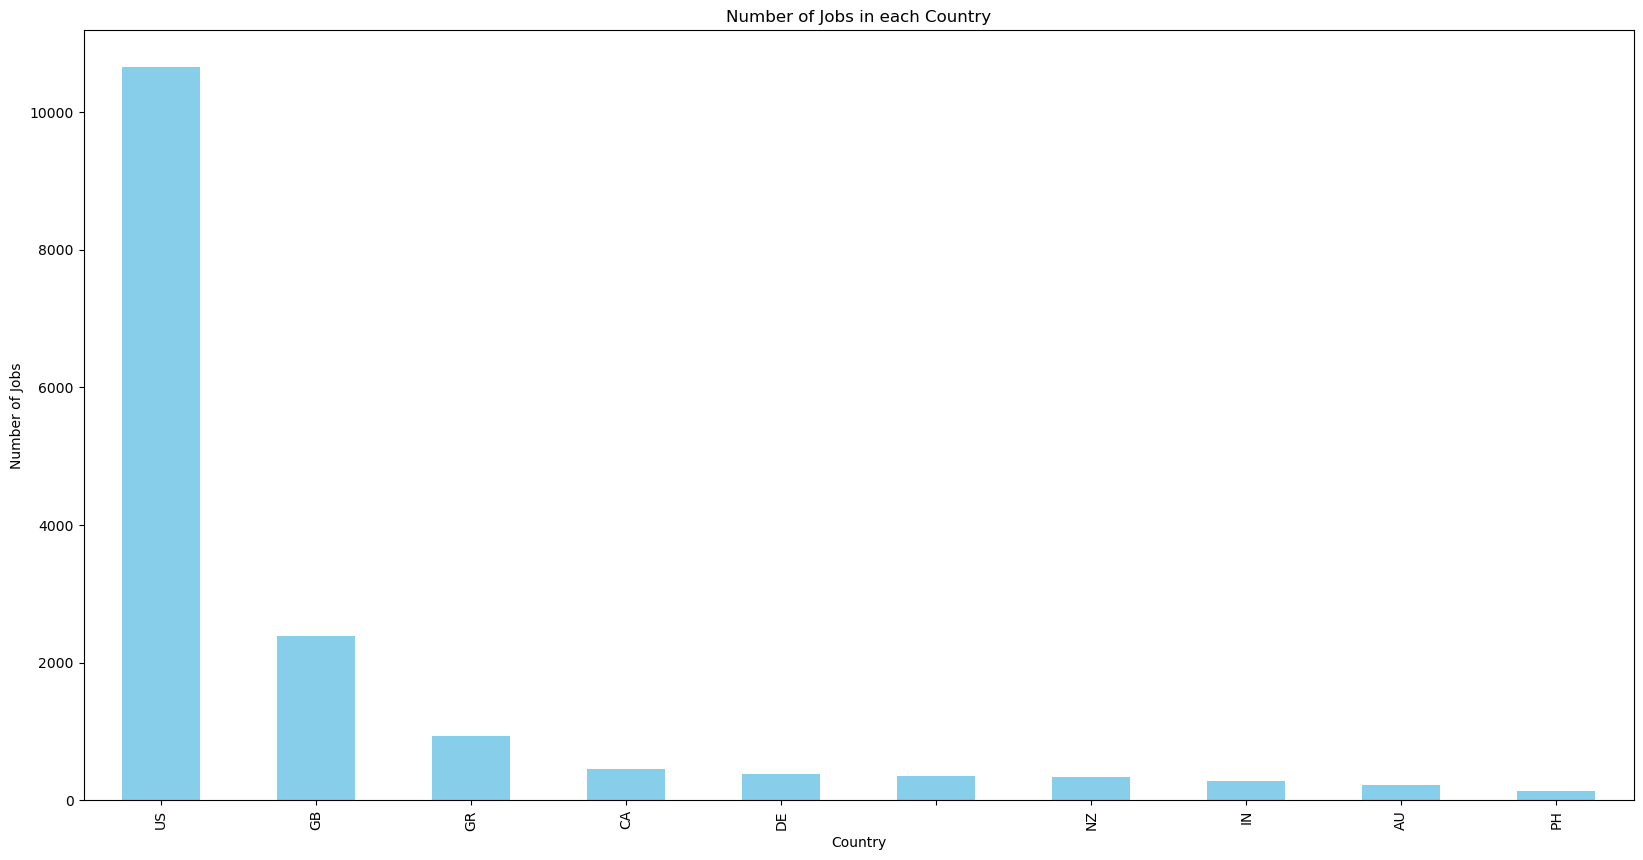

In [200]:
#counting number of jobs in each country
count_job_per_country = job_data['country'].value_counts()[:10]

#creating the bar chart
plt.figure(figsize=(20, 10))
count_job_per_country.plot(kind='bar', color='skyblue')
plt.title('Number of Jobs in each Country')
plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.show()

~Here we can see US have the maximum number of Job posting

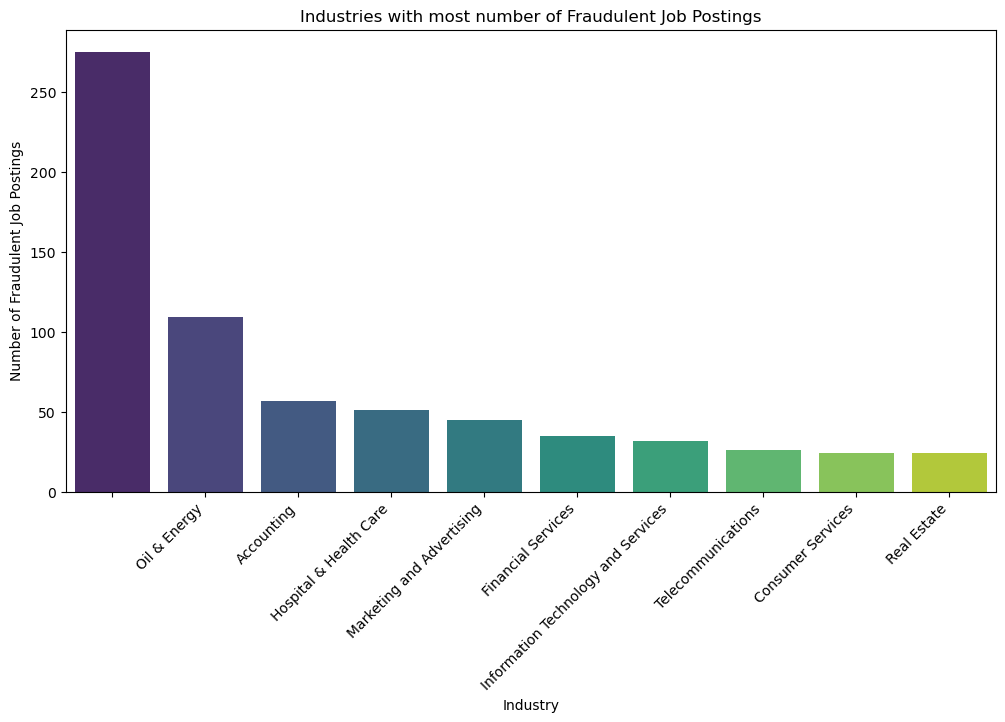

In [201]:
## Visualizing the highest number of fraudulent jobs based on the industries
ind_high = job_data[job_data['fraudulent'] == 1]['industry'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=ind_high.index, y=ind_high.values, palette='viridis')
plt.title('Industries with most number of Fraudulent Job Postings')
plt.xlabel('Industry')
plt.ylabel('Number of Fraudulent Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

~From the above visualization we can see
* Oil and Energy Industry has maximum number of fradulent Job posting.
* Real Estate have least number of fradulent Job posting.

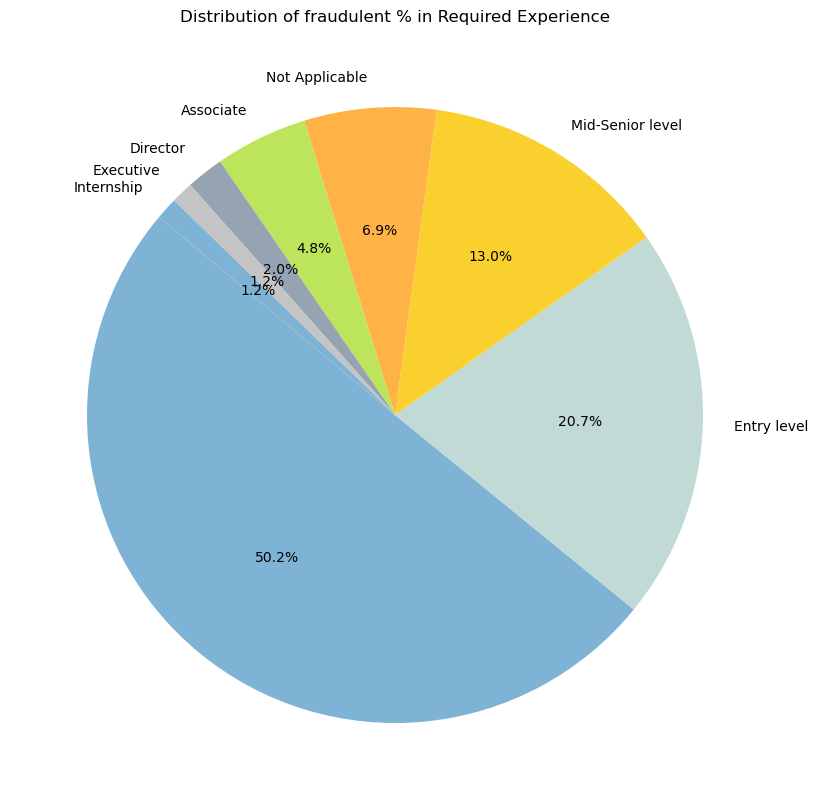

In [202]:
## Visualizing the number of fraudulent jobs based on the required experience in %
req_exp_cnt_frd = job_data[job_data['fraudulent'] == 1]['required_experience'].value_counts()
custom_colors = ['#7FB3D5', '#C1DAD6', '#FAD02E', '#FFB347', '#BCE55C', '#95A3B3', '#C4C4C4']
plt.figure(figsize=(10, 10))
plt.pie(req_exp_cnt_frd, labels=req_exp_cnt_frd.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Distribution of fraudulent % in Required Experience')
plt.show()

## Step -3 and 4 Applying Various Modules on our Dataset and Testing the model through Model Evaluation

#####MODEL- 1 LOGISTIC REGRESSION

In [203]:
#Importing various libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


In [204]:
#dropping the columns and creating new dataset
job_data_new = job_data.drop(['job_id','requirements','benefits','description','location','country'], axis=1)

In [205]:
#converting the  nan column in salary_range with average values
#job_data_new['salary_range'] = job_data_new['salary_range'].apply(lambda x: np.nan if pd.isna(x) else (sum(map(int, x.split('-'))) / 2))
def process_salary_range(x):
    try:
        if pd.isna(x) or ' ' in x:
            return np.nan
        return sum(map(int, x.split('-'))) / 2
    except ValueError:
        return np.nan

job_data_new['salary_range'] = job_data_new['salary_range'].apply(process_salary_range)

#### Performing Feature Engineering required for Logistic Regression approach

In [206]:
#doing tfidf on company profile
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
company_profile_tfidf = tfidf_vectorizer.fit_transform(job_data['company_profile'])
company_profile_df = pd.DataFrame(company_profile_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [207]:
#applying one hot encoding on the title and department columns
features = pd.get_dummies(job_data_new, columns=['title','department'])


In [208]:
features.columns

Index(['salary_range', 'company_profile', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function',
       ...
       'department_service', 'department_software', 'department_tech',
       'department_utilities', 'department_videographer',
       'department_warehouse', 'department_web development',
       'department_Área Comercial', 'department_ΕΜΠΟΡΙΚΟ',
       'department_ΠΛΗΡΟΦΟΡΙΚΗ'],
      dtype='object', length=12579)

In [209]:
# after dropping the columns from the dataset
new_features = features.drop(['salary_range','company_profile', 'employment_type', 'required_experience', 'required_education', 'industry', 'function'], axis=1)
new_features

,telecommuting,has_company_logo,has_questions,fraudulent,title_ Electrician,title_ Environmental Technician I,title_ Piping Material Engineer,"title_ Discipline Manager Civil, Structural, Marine, Architectural",title_ FEA Senior engineer,title_ Manager of Project Management Organization - Engineering,...,department_service,department_software,department_tech,department_utilities,department_videographer,department_warehouse,department_web development,department_Área Comercial,department_ΕΜΠΟΡΙΚΟ,department_ΠΛΗΡΟΦΟΡΙΚΗ
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17876,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17878,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
# Concatenate the TF-IDF features and one-hot encoded features
final_features = pd.concat([new_features, company_profile_df], axis=1)

In [211]:
# Split the data into features and target label
features = final_features.drop('fraudulent', axis=1)
target = final_features['fraudulent']

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(features, target, test_size=0.2, random_state=42)

model_LR = LogisticRegression()
model_LR.fit(X_train_LR, y_train_LR)

LogisticRegression()

In [212]:
y_pred_LR = model_LR.predict(X_test_LR)
accuracy = accuracy_score(y_test_LR, y_pred_LR)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9681208053691275


In [213]:
conf_matrix = confusion_matrix(y_test_LR, y_pred_LR)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3394    1]
 [ 113   68]]


In [214]:
class_report = classification_report(y_test_LR, y_pred_LR)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.99      0.38      0.54       181

    accuracy                           0.97      3576
   macro avg       0.98      0.69      0.76      3576
weighted avg       0.97      0.97      0.96      3576



In [215]:
roc_auc = roc_auc_score(y_test_LR, model_LR.predict_proba(X_test_LR)[:, 1])
print(f"ROC AUC Score: {roc_auc}")


ROC AUC Score: 0.9773521346796964


#### MODEL - 2 KNN


In [260]:
#importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [261]:
#creating the features variable and target variables
feature_vars = job_data.drop(['fraudulent'], axis=1)
target_vars = job_data['fraudulent']

In [264]:
#creating the label encoder for the features variable
le = LabelEncoder()
for col in ['location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'industry', 'function']:
    feature_vars[col] = le.fit_transform(feature_vars[col])

In [265]:
#creating the dummy variable for the target variable
job_data_dummy = pd.get_dummies(feature_vars)

In [266]:
#creating the training and testing dataset
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(job_data_dummy, target_vars, test_size=0.2, random_state=42)

In [267]:
#creating the KNN model
knn_cls = KNeighborsClassifier(n_neighbors=5)
knn_cls.fit(X_train_knn, y_train_knn)

KNeighborsClassifier()

In [268]:
#finding the predictors
knn_preds = knn_cls.predict(X_test_knn)

In [269]:
#finding the accuracy of the model
accuracy_score_knn = accuracy_score(y_test_knn, knn_preds)
print("Accuracy Score of KNN Classifier:", accuracy_score_knn)

Accuracy Score of KNN Classifier: 0.9614093959731543


In [270]:
#defining the confusion matrix and creating it
confusion_matrix_knn = confusion_matrix(y_test_knn, knn_preds)
print("Confusion Matrix of KNN Classifier:",confusion_matrix_knn)

Confusion Matrix of KNN Classifier: [[3358   36]
 [ 102   80]]


In [271]:
#creating the report for knn
classification_report_knn = classification_report(y_test_knn, knn_preds)
print("Classification Report of KNN Classifier:",classification_report_knn)

Classification Report of KNN Classifier:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3394
           1       0.69      0.44      0.54       182

    accuracy                           0.96      3576
   macro avg       0.83      0.71      0.76      3576
weighted avg       0.96      0.96      0.96      3576



In [272]:
#defining the roc-auc score
roc_auc_knn = roc_auc_score(y_test_knn, knn_preds)
print("ROC-AUC Score for KNN Classifier::", roc_auc_knn)

ROC-AUC Score for KNN Classifier:: 0.7144767430565898


#### MODEL - 3 RANDOM FOREST

In [273]:
#creating the training and testing dataset
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(job_data_dummy, target_vars, test_size=0.2, random_state=42)

In [274]:
#creating the random forest variables
random_forest_cls = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_cls.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [275]:
#predicting the values for test variable
random_forest_preds = random_forest_cls.predict(X_test_rf)

In [276]:
#finding the accuracy of random forest
accuracy_score_rf = accuracy_score(y_test_rf, random_forest_preds)
print("Accuracy Score of Random Forest Classifier:", accuracy_score_rf)

Accuracy Score of Random Forest Classifier: 0.9801454138702461


In [277]:
#creating the confusion matrix
confusion_matrix_rf = confusion_matrix(y_test_rf, random_forest_preds)
print("Confusion Matrix of Random Forest Classifier:",confusion_matrix_rf)

Confusion Matrix of Random Forest Classifier: [[3394    0]
 [  71  111]]


In [278]:
#defining the report for the rf model
classification_report_rf = classification_report(y_test_rf, random_forest_preds)
print("Classification Report of Random Forest Classifier:",classification_report_rf)

Classification Report of Random Forest Classifier:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3394
           1       1.00      0.61      0.76       182

    accuracy                           0.98      3576
   macro avg       0.99      0.80      0.87      3576
weighted avg       0.98      0.98      0.98      3576



In [279]:
# Assuming y_test and random_forest_preds are your true labels and predicted labels, respectively
roc_score_rf = roc_auc_score(y_test_rf, random_forest_preds)
print("ROC-AUC Score of Random Forest Classifier:", roc_score_rf)

ROC-AUC Score of Random Forest Classifier: 0.804945054945055


~ We tried 3 different models.
* So we will move forward with more complex model (DEEP LEARNING).
* AS we can that the dataset columns which have textual information so first we will do Text Preprocessing using NLP
* After that we will implement Deep Learning model


### Text Preprocessing



~ We will be doing text processing on description column so first check number of null values for discription

In [233]:
#we will first find how many description have just blank value
empty_description = job_data['description'] == " "

# Print rows where 'description' is an empty string
job_data[empty_description]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
17513,17514,Office Manager,"PL, MZ, Warsaw",,,,,,,0,0,0,,,,,,1,PL


~as there is only one row so we will remove that row

In [234]:
#deleting that particular row
job_data = job_data[~empty_description]

job_data.shape

(17879, 19)

In [235]:
# for query search and  text preprocessing we will be combining the title, description and title column
job_data['job_text_info'] = job_data['title'] + ' ' + job_data['description'] + ' ' + job_data['company_profile']
# Print the resulting DataFrame
job_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,job_text_info
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,US,"Marketing Intern Food52, a fast-growing, James..."
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ,Customer Service - Cloud Video Production Orga...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,US,Commissioning Machinery Assistant (CMA) Our cl...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,Account Executive - Washington DC THE COMPANY:...
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,Bill Review Manager JOB TITLE: Itemization Rev...


In [236]:
#lowercasing the values
job_data['job_text_info'] = job_data['job_text_info'].str.lower()


In [237]:
#we will be removing the punctuations
import string

# here we are converting the 'job_text_info' to type str
job_data['job_text_info'] = job_data['job_text_info'].astype(str)

#here we are removing the punctuations
job_data['job_text_info'] = job_data['job_text_info'].str.translate(str.maketrans('', '', string.punctuation))



In [238]:
#importing the modules
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
#applying tokenization
job_data['job_text_info'] = job_data['job_text_info'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/himanshiraturi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [239]:
#importing the modules required for stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#defining the stop_words
stop_words = set(stopwords.words('english'))
#removing stop_words
job_data['job_text_info'] = job_data['job_text_info'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/himanshiraturi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [240]:
#downloading the modules
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/himanshiraturi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [241]:
#importing the modules for lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

#creating a lemmatizer
lemmatizer = WordNetLemmatizer()
#defining the lemmatzation
job_data['job_text_info'] = job_data['job_text_info'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/himanshiraturi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [242]:
#joining the string which is comma seperated
job_data['job_text_info'] = job_data['job_text_info'].apply(lambda x: ' '.join(x))

In [243]:
#reading the job_text_info columns
job_data['job_text_info'].head(5)

0    marketing intern food52 fastgrowing james bear...
1    customer service cloud video production organi...
2    commissioning machinery assistant cma client l...
3    account executive washington dc company esri –...
4    bill review manager job title itemization revi...
Name: job_text_info, dtype: object

In [244]:
#performing the Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

# defining the vectorizer to perform Tfid
vectorizer = TfidfVectorizer(max_features=9000)
job_text_x = vectorizer.fit_transform(job_data['job_text_info'])


In [245]:
from sklearn.model_selection import train_test_split
#creating the training and testing dataset
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(job_text_x, job_data['fraudulent'], test_size=0.2, random_state=42)


#### MODEL - 4 Neural Network

In [246]:
#importing the modules required for MLPclassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [247]:
# #Instatiatie our MLPClassifier
solver_param = 'adam'
activation_param = 'relu'
model_mlp = MLPClassifier(solver=solver_param,
                    activation = activation_param,
                   hidden_layer_sizes = (100,50,30),
                    max_iter = 1000)

In [248]:
#performing the fit on the model
model_mlp.fit(X_train_NN, y_train_NN)

MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=1000)

In [250]:
#making prediction using mlpClassifier
mlp_pred = model_mlp.predict(X_test_NN)

#Printing the roc_score
print("The ROC-AUC score is {}".format(roc_auc_score(y_test_NN, mlp_pred)))
#printing the classification_report
print()
print("The Classification report is {}".format(classification_report(y_test_NN, mlp_pred)))

The ROC-AUC score is 0.8847108990008223

The Classification report is               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3394
           1       0.89      0.77      0.83       182

    accuracy                           0.98      3576
   macro avg       0.94      0.88      0.91      3576
weighted avg       0.98      0.98      0.98      3576



In [251]:
#finding the accuracy of the mlp classifier
accuracy_mlpC = accuracy_score(y_test_NN, mlp_pred)
#priniting the result
print(f'Accuracy: {accuracy_mlpC:.2%}')

Accuracy: 98.35%


In [252]:
#printing the shape of the job_data
print(job_data.shape)

(17879, 20)


~ We can see that there are total
* 17879 rows
* and 20 columns

In [253]:
print(job_text_x.shape)

(17879, 9000)


#### Implementing search query by finding the cosine similarity

In [254]:
# Count occurrences of " " for each column
empty_string_values_per_column = (job_data == " ").sum()

# Display the result
print(empty_string_values_per_column)

job_id                     0
title                      0
location                 346
department             11552
salary_range           15011
company_profile         3307
description                0
requirements            2694
benefits                7209
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3470
required_experience     7049
required_education      8104
industry                4902
function                6454
fraudulent                 0
country                  346
job_text_info              0
dtype: int64


In [255]:
#importing the required modules
from sklearn.metrics.pairwise import cosine_similarity
import string

In [256]:
#definig the method
def search_for_jobs(job_query, data, vectorizer, job_data):

    #processing the queries
    job_query = job_query.lower()
    job_query = job_query.translate(str.maketrans('', '', string.punctuation))
    job_query = word_tokenize(job_query)
    job_query = [word for word in job_query if word not in stop_words]
    job_query = [lemmatizer.lemmatize(word) for word in job_query]
    job_query = ' '.join(job_query)

    #creating the vector for the job query
    job_query_vector = vectorizer.transform([job_query])

    #computing the similarities between job vector and the description
    similarities_job = cosine_similarity(job_query_vector, data)

    # Get indices of jobs sorted by similarity (descending order)
    indices_job = similarities_job.argsort()[0][::-1]
    indices_job = indices_job[:20]
    selected_job_rows = job_data.loc[indices_job]

    # Return the indices of relevant jobs
    return selected_job_rows


In [257]:
# Example usage
user_query = "interested in finance"
result_indices = search_for_jobs(user_query, job_text_x, vectorizer, job_data)

# Display the indices
result_indices


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,job_text_info
17719,17720,CUSTOMER SERVICE REP,"US, TX, DALLAS",,,,DescriptionJob Title: Customer Service Represe...,HIGH SCHOOL DIPLOMA,"HEALTH,DENTAL INSURANCE , 401K , STOCK PLAN FO...",0,0,0,Full-time,Associate,High School or equivalent,Consumer Services,Customer Service,1,US,customer service rep descriptionjob title cust...
7830,7831,Position Finance Assistant,"AU, VIC, Melbourne",,25000-30000,,"We have positions available for confident, out...",Personal attributes would include: • Intermedi...,Benefits include: · Base wage of $450 per week...,0,0,0,Part-time,,,Banking,Finance,1,AU,position finance assistant position available ...
12721,12722,Finance Analyst (Fixed term contract),"GB, LND, Shoreditch",Finance,,ustwo offers you the opportunity to be yoursel...,Ustwo London are looking for an experienced Fi...,Technical requirements/skillsBring numbers to ...,Above anything we are people centred company t...,0,1,0,Contract,Mid-Senior level,,,Finance,0,GB,finance analyst fixed term contract ustwo lond...
7642,7643,Banking and Finance Attorney,"US, NC, Charlotte",Legal,,,Special Counsel’s Charlotte office is searchin...,,,0,1,1,,,,,,0,US,banking finance attorney special counsel ’ cha...
4237,4238,Senior Associate Corporate Finance & Planning,"PK, IS, Islamabad",Finance,,,Position Title: Senior Associate Corporate Fin...,Essential Requirements:-- Experience in IPP (I...,,0,0,1,,,,,,0,PK,senior associate corporate finance planning po...
4671,4672,Assistant Manager Corporate Finance & Planning,"PK, IS, Islamabad",,,,Position Title: Assistant Manager Corporate Fi...,Essential Requirements (by Career Pakistan): S...,,0,0,1,,,,,,0,PK,assistant manager corporate finance planning p...
1448,1449,Finance Manager,"GB, LND, London",Accounts,22000-30000,Wedo is a collection of niched e-commerce stor...,About us:Wedo is a curated collection of niche...,"Qualifications:Currently studying towards AAT,...","Salary: £22,000- 30,000 p/a depending on exper...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Finance,0,GB,finance manager uswedo curated collection nich...
9618,9619,Finance and Accounting Analyst,"BR, SP, São Paulo",,,"Nubank is an early stage, technology-driven fi...",Why is the Finance &amp; Accounting Analyst po...,This kind of experience/background is relevant...,"Competitive compensation packageHealth, dental...",0,1,1,Full-time,,,Financial Services,,0,BR,finance accounting analyst finance amp account...
14947,14948,Freelance Writer -- Finance,"US, ,",Content,,ConsumerTrack is a technology-centric internet...,Have you written extensively on finance or per...,Previous freelance writing experience (samples...,,1,1,1,,,,,,0,US,freelance writer finance written extensively f...
8504,8505,Attorney,"US, NV, Las Vegas",,,Tidewater Finance Co. was established in 1992 ...,"Tidewater Finance Company, an industry leader ...","Required Education, Experience and SkillsBach...",Our company offers a competitive salary plus B...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Financial Services,Legal,0,US,attorney tidewater finance company industry le...


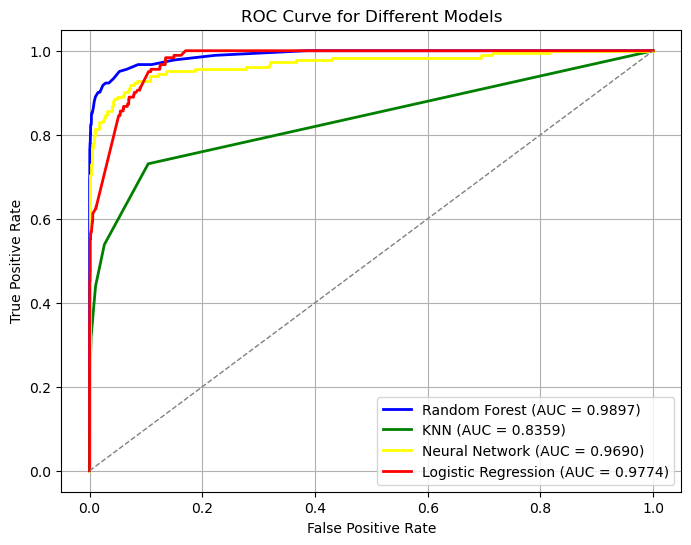

In [286]:
## Plotting the ROC curve for different models that we used

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

rf_probs = random_forest_cls.predict_proba(X_test_rf)[:, 1]
knn_probs = knn_cls.predict_proba(X_test_knn)[:, 1]
mlp_probs = model_mlp.predict_proba(X_test_NN)[:, 1]
lr_probs = model_LR.predict_proba(X_test_LR)[:, 1]

# ROC curve for Random Forest Classifier Model
false_pos_rt_rf, true_pos_rt_rf, _ = roc_curve(y_test_rf, rf_probs)
roc_auc_rf = auc(false_pos_rt_rf, true_pos_rt_rf)

# ROC curve for K-Nearest Neighbors Model
false_pos_rt_knn, true_pos_rt_knn, _ = roc_curve(y_test_knn, knn_probs)
roc_auc_knn = auc(false_pos_rt_knn, true_pos_rt_knn)

# ROC curve for Neural Networks Model
false_pos_rt_mlp, true_pos_rt_mlp, _ = roc_curve(y_test_NN, mlp_probs)
roc_auc_mlp = auc(false_pos_rt_mlp, true_pos_rt_mlp)

# ROC curve for Logistic Regression model
false_pos_rt_lr, true_pos_rt_lr, _ = roc_curve(y_test_LR, lr_probs)
roc_auc_lr = auc(false_pos_rt_lr, true_pos_rt_lr)

# Plotting the models
plt.figure(figsize=(8, 6))
plt.plot(false_pos_rt_rf, true_pos_rt_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(false_pos_rt_knn, true_pos_rt_knn, color='green', lw=2, label=f'KNN (AUC = {roc_auc_knn:.4f})')
plt.plot(false_pos_rt_mlp, true_pos_rt_mlp, color='yellow', lw=2, label=f'Neural Network (AUC = {roc_auc_mlp:.4f})')
plt.plot(false_pos_rt_lr, true_pos_rt_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.title('ROC Curve for Different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()